# Finding a shopping trend in three diffrent branches of a SuperStore:

here I have a dataset from a superstore located in 3 diffrent city and each city has a branch ( Yangon : Branch A, Mandalay: Branch B and Naypyitaw : Branch C)
Doing some visualazation of this dataset I try to find a shopping trends in this superstore.

The data gathered from first three month of the 2019.

In [165]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [166]:
df = pd.read_csv('./supermarket_sales - Sheet1.csv')

In [167]:
df.head()

,Invoice ID,Branch,City,Customer type,Gender,Product line,Unit price,Quantity,Tax 5%,Total,Date,Time,Payment,cogs,gross margin percentage,gross income,Rating
0,750-67-8428,A,Yangon,Member,Female,Health and beauty,74.69,7,26.1415,548.9715,1/5/2019,13:08,Ewallet,522.83,4.761905,26.1415,9.1
1,226-31-3081,C,Naypyitaw,Normal,Female,Electronic accessories,15.28,5,3.8200,80.2200,3/8/2019,10:29,Cash,76.40,4.761905,3.8200,9.6
2,631-41-3108,A,Yangon,Normal,Male,Home and lifestyle,46.33,7,16.2155,340.5255,3/3/2019,13:23,Credit card,324.31,4.761905,16.2155,7.4
3,123-19-1176,A,Yangon,Member,Male,Health and beauty,58.22,8,23.2880,489.0480,1/27/2019,20:33,Ewallet,465.76,4.761905,23.2880,8.4
4,373-73-7910,A,Yangon,Normal,Male,Sports and travel,86.31,7,30.2085,634.3785,2/8/2019,10:37,Ewallet,604.17,4.761905,30.2085,5.3


In [168]:
df.shape

(1000, 17)

In [169]:
# Convert Time and Date columns to Date_time series so I can stract the month and hour from it.
df.Time = pd.to_datetime(df.Time)
df.Date = pd.to_datetime(df.Date)
df['hour'] = df.Time.dt.hour
df['month']=df.Date.dt.month

In [170]:
df.head()

,Invoice ID,Branch,City,Customer type,Gender,Product line,Unit price,Quantity,Tax 5%,Total,Date,Time,Payment,cogs,gross margin percentage,gross income,Rating,hour,month
0,750-67-8428,A,Yangon,Member,Female,Health and beauty,74.69,7,26.1415,548.9715,2019-01-05,2022-02-18 13:08:00,Ewallet,522.83,4.761905,26.1415,9.1,13,1
1,226-31-3081,C,Naypyitaw,Normal,Female,Electronic accessories,15.28,5,3.8200,80.2200,2019-03-08,2022-02-18 10:29:00,Cash,76.40,4.761905,3.8200,9.6,10,3
2,631-41-3108,A,Yangon,Normal,Male,Home and lifestyle,46.33,7,16.2155,340.5255,2019-03-03,2022-02-18 13:23:00,Credit card,324.31,4.761905,16.2155,7.4,13,3
3,123-19-1176,A,Yangon,Member,Male,Health and beauty,58.22,8,23.2880,489.0480,2019-01-27,2022-02-18 20:33:00,Ewallet,465.76,4.761905,23.2880,8.4,20,1
4,373-73-7910,A,Yangon,Normal,Male,Sports and travel,86.31,7,30.2085,634.3785,2019-02-08,2022-02-18 10:37:00,Ewallet,604.17,4.761905,30.2085,5.3,10,2


In [171]:
df.month.unique()

array([1, 3, 2])

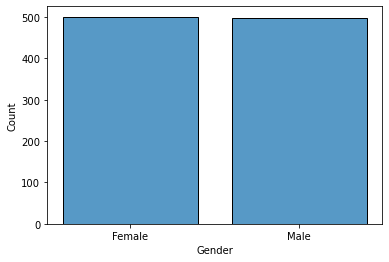

In [172]:
# Customer Gender Distribution
_ = sns.histplot(x='Gender',data=df,shrink=.8)

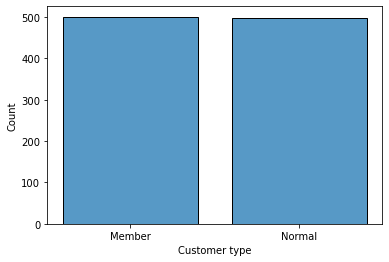

In [173]:
# Customer Type distribution
_ = sns.histplot(x='Customer type',data=df,shrink=.8)

There is a well balanced distribution for Gender and Type for the customer. There are slightly more Female customer and also slightly more Member customers.

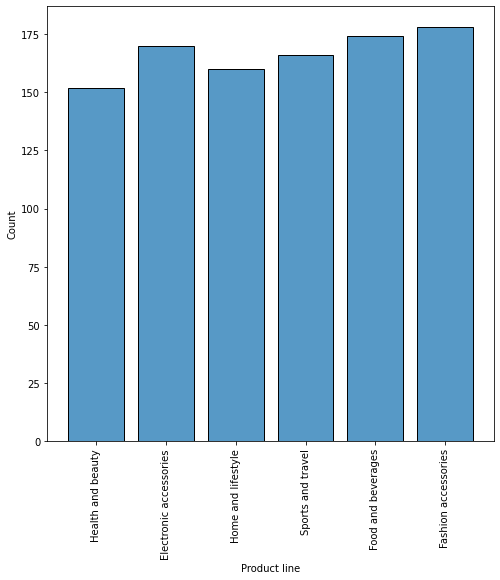

In [174]:
plt.subplots(figsize=(8,8))
_ = sns.histplot(x='Product line',data=df,shrink=.8)
_ = plt.xticks(rotation=90)

Fashoin accessories and Food products are more favourable among the customer, but there is overal balanced distrubution of the products.

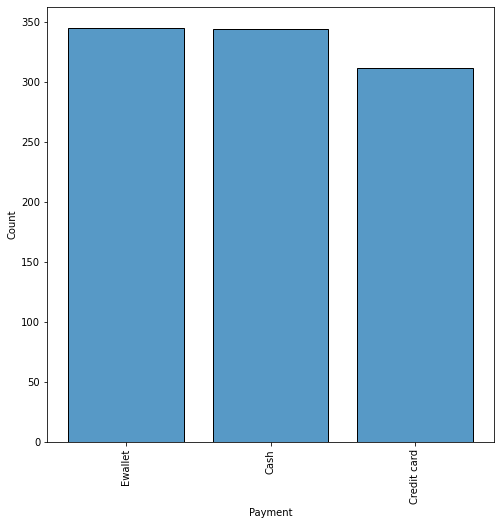

In [175]:
plt.subplots(figsize=(8,8))
_ = sns.histplot(x='Payment',data=df,shrink=.8)
_ = plt.xticks(rotation=90)

Credit Card less used in compare to cash and Ewallet. When it comes to pay electronically people prefere to use thier phone insted of credit card itself.

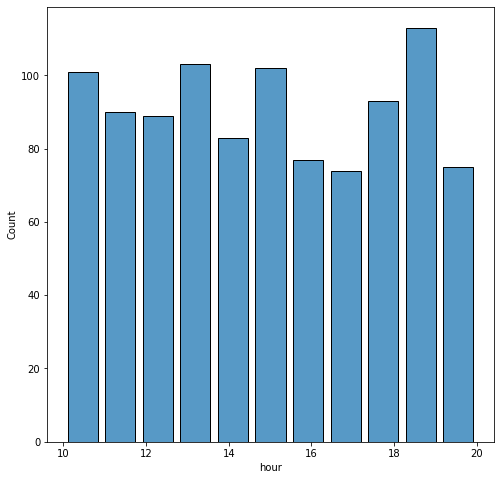

In [176]:
plt.subplots(figsize=(8,8))
_ = sns.histplot(x='hour',data=df,shrink=.8)

There is a rush over around 6 to 7 pm and stores are less busy between 4pm to 5pm. 

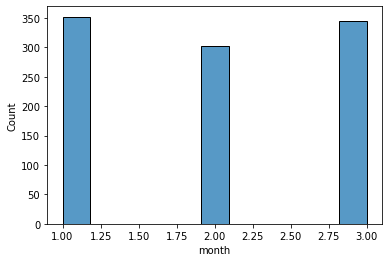

In [177]:
_ = sns.histplot(x='month',data=df)

Despite the universal belife that January is not a busy season for shopping, data shows that February actually is quiter than January.

## Total Income:

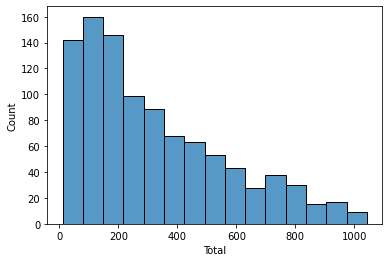

In [178]:
_ = sns.histplot(x='Total',data=df)

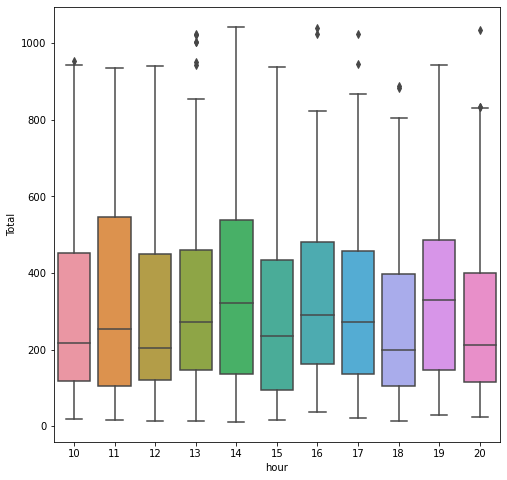

In [195]:
plt.subplots(figsize=(8,8))
_ = sns.boxplot(x='hour',y='Total',data=df)

Although the rush hour is around 7 pm, but stores have good income around 11 am and 2 pm also.

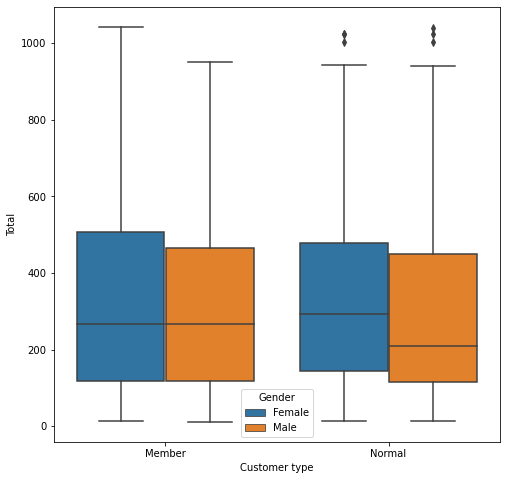

In [194]:
plt.subplots(figsize=(8,8))
_ = sns.boxplot(x='Customer type',y='Total',hue='Gender',data=df)

As we can predict Members brings more income for the stores and Females tends to shope more. But what it might be interesting is non-member females seems spends more than female member.
Why is that?

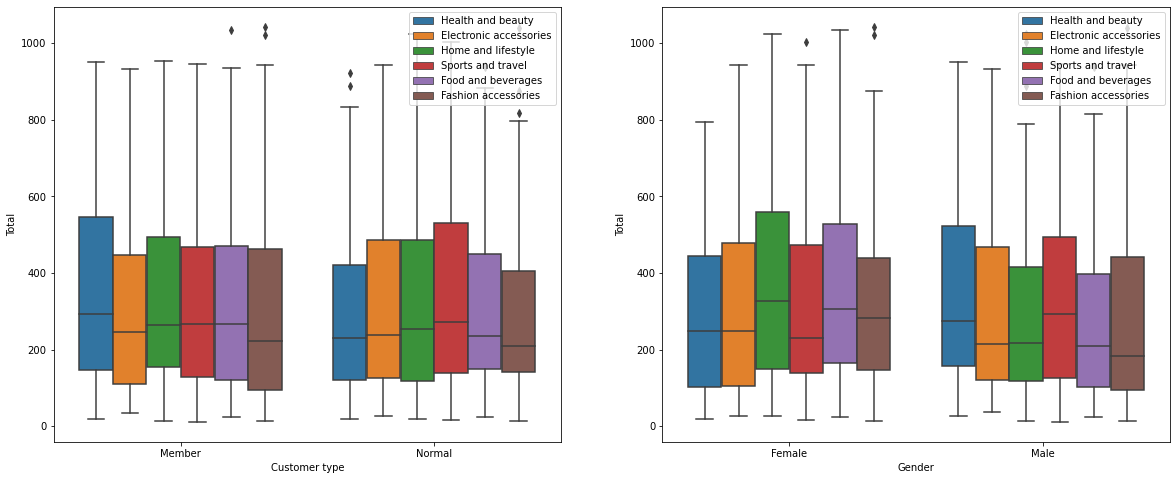

In [190]:
fig,axes = plt.subplots(1,2,figsize=(20,8))
_ = sns.boxplot(ax=axes[0],x='Customer type',y='Total',hue='Product line',data=df)
_ = sns.boxplot(ax=axes[1],x='Gender',y='Total',hue='Product line',data=df)
_ = axes[0].legend(loc='upper right')
_ = axes[1].legend(loc='upper right')

It might be because non-member female tends to spend more on Home and lifestyle.

In [157]:
df1 = df.groupby(['Product line','Gender']).mean()
df1 = df1.reset_index()

In [191]:
df1.head()

,Product line,Gender,Unit price,Quantity,Tax 5%,Total,cogs,gross margin percentage,gross income,Rating,hour,month
0,Electronic accessories,Female,52.051548,5.809524,15.363958,322.643125,307.279167,4.761905,15.363958,6.786905,14.404762,2.083333
1,Electronic accessories,Male,55.016744,5.616279,15.080570,316.691965,301.611395,4.761905,15.080570,7.059302,15.558140,2.011628
2,Fashion accessories,Female,55.526979,5.520833,15.097917,317.056250,301.958333,4.761905,15.097917,7.120833,14.708333,1.916667
3,Fashion accessories,Male,59.058049,4.536585,13.860915,291.079207,277.218293,4.761905,13.860915,6.921951,15.463415,1.975610
4,Food and beverages,Female,60.090333,5.711111,17.550750,368.565750,351.015000,4.761905,17.550750,7.203333,15.077778,2.044444


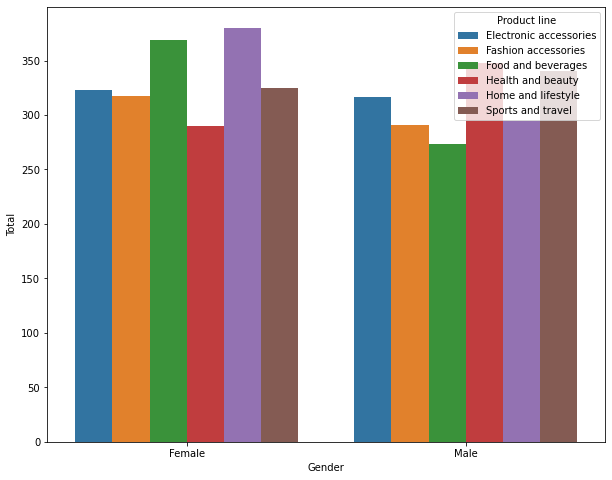

In [192]:
plt.subplots(figsize=(10,8))
_ = sns.barplot(x="Gender",y="Total",hue='Product line',data=df1)

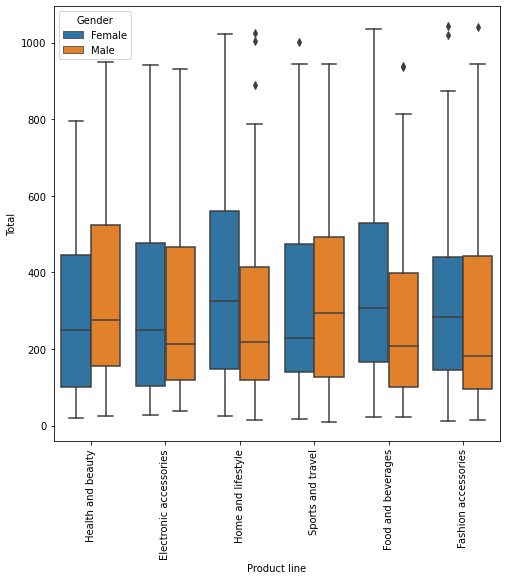

In [196]:
plt.subplots(figsize=(8,8))
_ = sns.boxplot(x='Product line',y='Total',hue='Gender',data=df)
_ = plt.xticks(rotation=90)

Female customer spends more on Home and lifestyle and Food, while suprisingly Male spends more on health and beauty beside the expected Electronics.

## Gross Income:

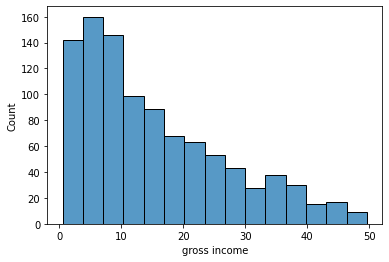

In [69]:
_ = sns.histplot(x='gross income',data=df)

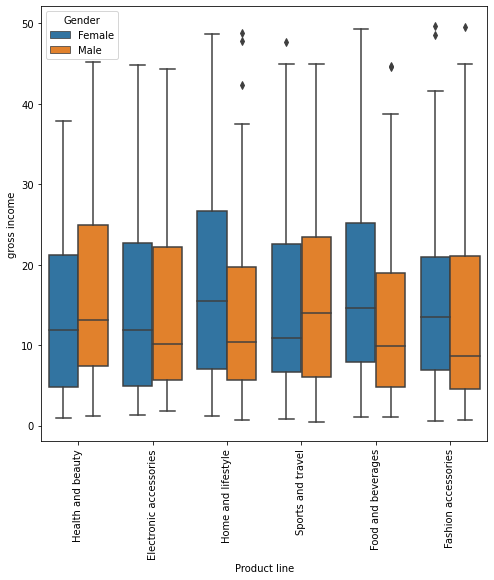

In [197]:
plt.subplots(figsize=(8,8))
_ = sns.boxplot(x='Product line',y='gross income',hue='Gender',data=df)
_ = plt.xticks(rotation=90)

Same trends as we see in total income are apparents in gross income.

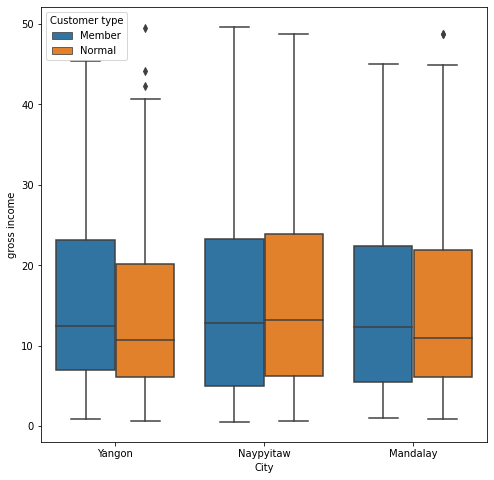

In [198]:
plt.subplots(figsize=(8,8))
_ = sns.boxplot(x='City',y='gross income',hue='Customer type',data=df)

Stores in Yangon has less gross income in general, but members are more actives on that city, While other city has more Normal customer and more gross income. Therefore we might be able to say that normal customer are more important to incrising the gross income rather than the Members.

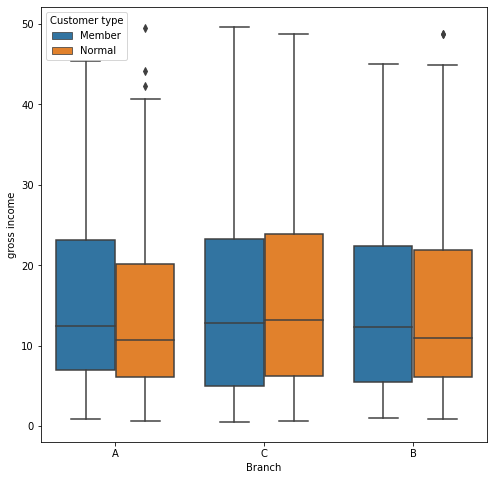

In [199]:
plt.subplots(figsize=(8,8))
_ = sns.boxplot(x='Branch',y='gross income',hue='Customer type',data=df)

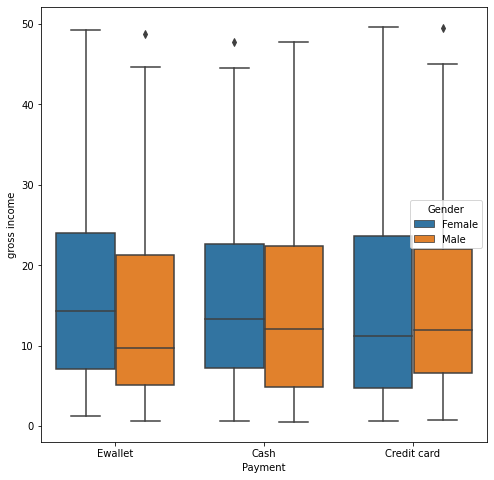

In [200]:
plt.subplots(figsize=(8,8))
_ = sns.boxplot(x='Payment',y='gross income',hue='Gender',data=df)

Female spends more electronicaly but brings less profit for the stores.

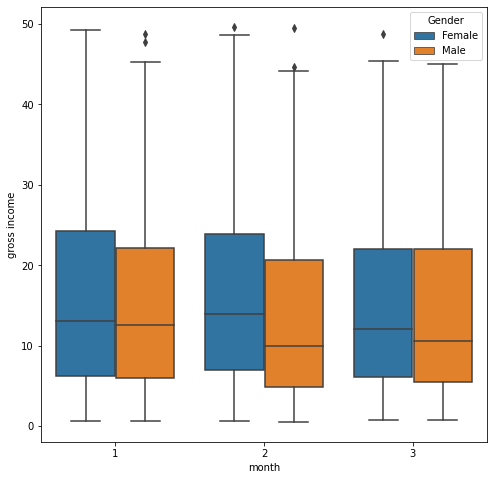

In [201]:
plt.subplots(figsize=(8,8))
_ = sns.boxplot(x='month',y='gross income',hue='Gender',data=df)

## Rating:

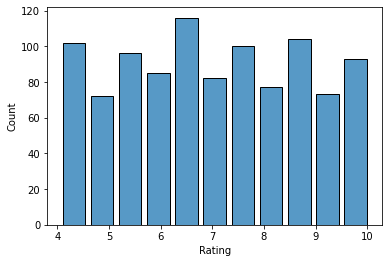

In [82]:
_ = sns.histplot(x='Rating',data=df,shrink=0.8)

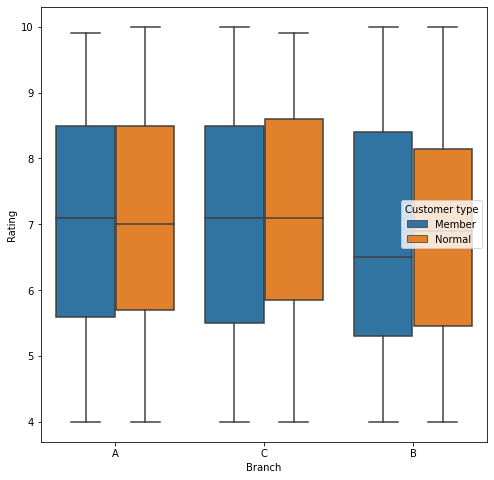

In [202]:
plt.subplots(figsize=(8,8))
_ = sns.boxplot(x='Branch',y='Rating',hue='Customer type',data=df)

In general all diffrent branches has same rating but Male gave less than average rating for Branch B and that leds brand B to have a less average of rate in total.

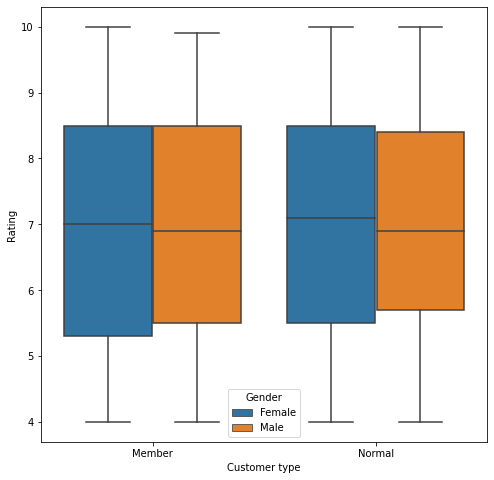

In [203]:
plt.subplots(figsize=(8,8))
_ = sns.boxplot(x='Customer type',y='Rating',hue='Gender',data=df)

No diffrent distribution for rating amoung the member and non-member customers.

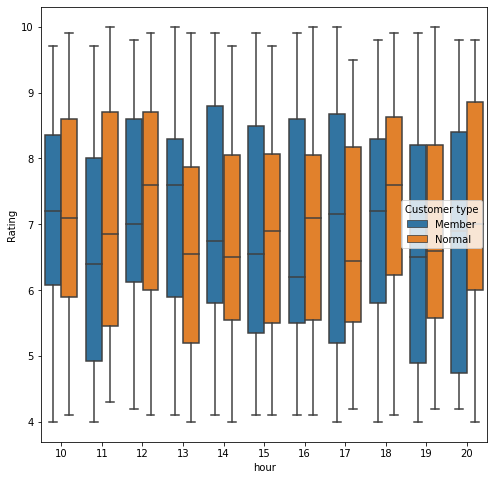

In [204]:
plt.subplots(figsize=(8,8))
_ = sns.boxplot(x='hour',y='Rating',hue='Customer type',data=df)

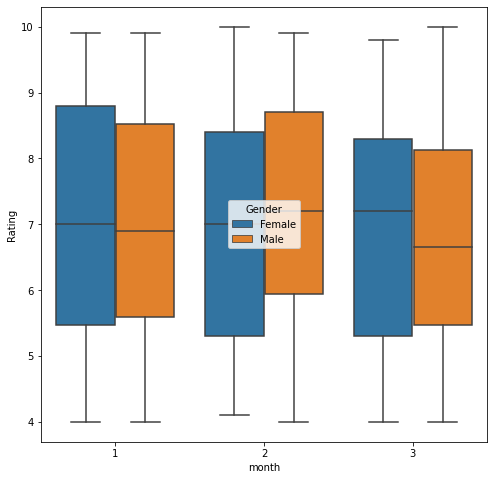

In [205]:
plt.subplots(figsize=(8,8))
_ = sns.boxplot(x='month',y='Rating',hue='Gender',data=df)

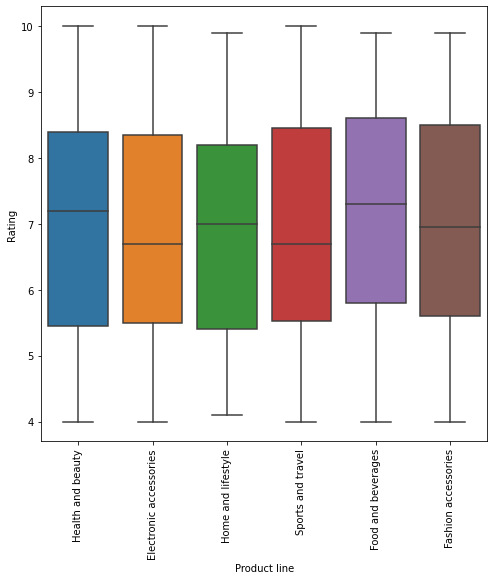

In [206]:
plt.subplots(figsize=(8,8))
_ = sns.boxplot(x='Product line',y='Rating',data=df)
_ = plt.xticks(rotation=90)

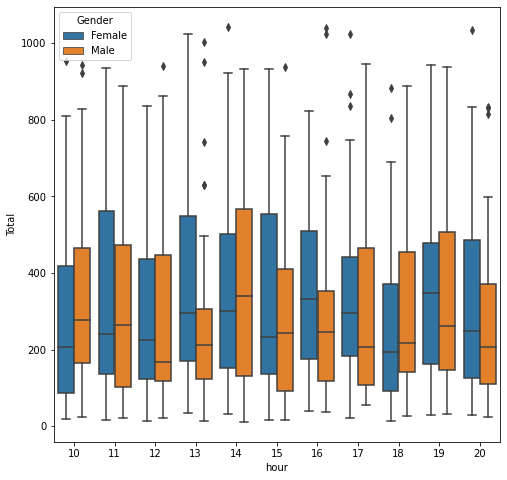

In [207]:
plt.subplots(figsize=(8,8))
_ = sns.boxplot(x='hour',y='Total',hue="Gender",data=df)